In [113]:
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt


In [114]:
df=pd.read_csv("income.csv")

In [115]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [116]:
df=df.rename({"Income($)":"Income"},axis=1) # change of column name

In [117]:
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


<AxesSubplot: xlabel='Age', ylabel='Income'>

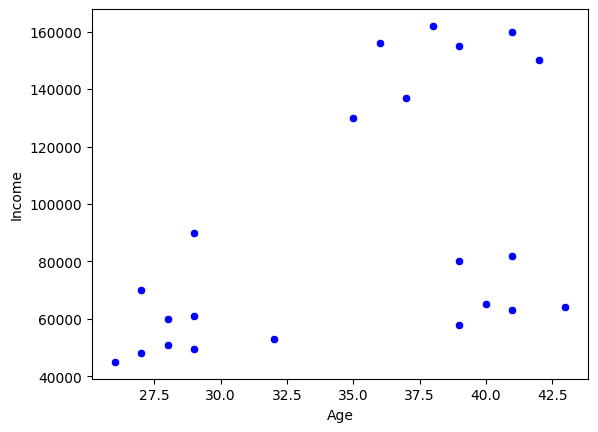

In [118]:
sns.scatterplot(x=df.Age,y=df.Income,color="blue")

km=KMeans(n_clusters=3)

In [119]:
km

KMeans(n_clusters=3)

In [120]:
x=df.drop('Name',axis=1)

In [121]:
x

,Age,Income
0,27,70000
1,29,90000
2,29,61000
3,28,60000
4,42,150000
5,39,155000
6,41,160000
7,38,162000
8,36,156000
9,35,130000


In [122]:
km.fit(x)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [123]:
km.predict(x)

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [124]:
ypredicted=km.predict(x)

In [125]:
df['cluster']=ypredicted

In [126]:
df

,Name,Age,Income,cluster
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


In [127]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]


<AxesSubplot: xlabel='Age', ylabel='Income'>

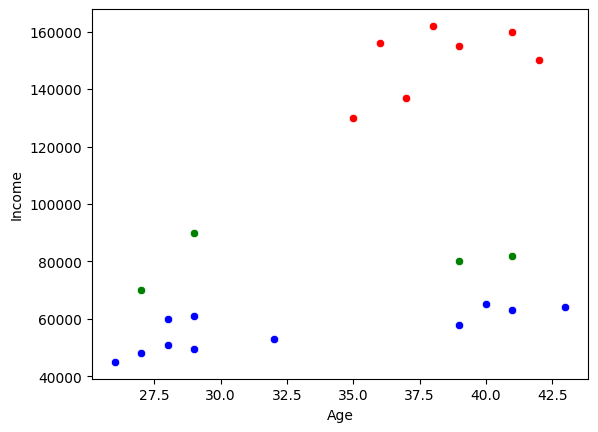

In [128]:
sns.scatterplot(x=df1['Age'],y=df1['Income'],color='green')
sns.scatterplot(x=df2['Age'],y=df2['Income'],color='red')
sns.scatterplot(x=df3['Age'],y=df3['Income'],color='blue')

In [129]:
# here we see some problem in scaling so we use
#minmaxscale

In [130]:
scaler=MinMaxScaler()

In [131]:
scaler.fit(df[['Age']])

MinMaxScaler()

In [132]:
df['Age']=scaler.transform(df[['Age']])

In [133]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,70000,0
1,Michael,0.176471,90000,0
2,Mohan,0.176471,61000,2
3,Ismail,0.117647,60000,2
4,Kory,0.941176,150000,1
5,Gautam,0.764706,155000,1
6,David,0.882353,160000,1
7,Andrea,0.705882,162000,1
8,Brad,0.588235,156000,1
9,Angelina,0.529412,130000,1


In [134]:
scaler.fit(df[['Income']])

MinMaxScaler()

In [135]:
df['Income']=scaler.transform(df[['Income']])

In [140]:
df.drop('cluster',axis=1)  # we drop the cluster bcz we need to train the model from start and find new cluster 

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [143]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


In [144]:
df.drop('cluster',axis='columns',inplace=True)

In [145]:
df

,Name,Age,Income
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615
2,Mohan,0.176471,0.136752
3,Ismail,0.117647,0.128205
4,Kory,0.941176,0.897436
5,Gautam,0.764706,0.940171
6,David,0.882353,0.982906
7,Andrea,0.705882,1.000000
8,Brad,0.588235,0.948718
9,Angelina,0.529412,0.726496


In [146]:
ram=df[['Age','Income']]

In [147]:
ram

,Age,Income
0,0.058824,0.213675
1,0.176471,0.384615
2,0.176471,0.136752
3,0.117647,0.128205
4,0.941176,0.897436
5,0.764706,0.940171
6,0.882353,0.982906
7,0.705882,1.000000
8,0.588235,0.948718
9,0.529412,0.726496


In [148]:
km.fit(ram)  # here we train model with new income and age

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [151]:
km.predict(ram)

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [159]:
y_pre=km.predict(ram)

In [160]:
df['cluster']=y_pre

In [161]:
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [162]:
df1=df[df["cluster"]==0]
df2=df[df["cluster"]==1]
df3=df[df["cluster"]==2]

<AxesSubplot: xlabel='Age', ylabel='Income'>

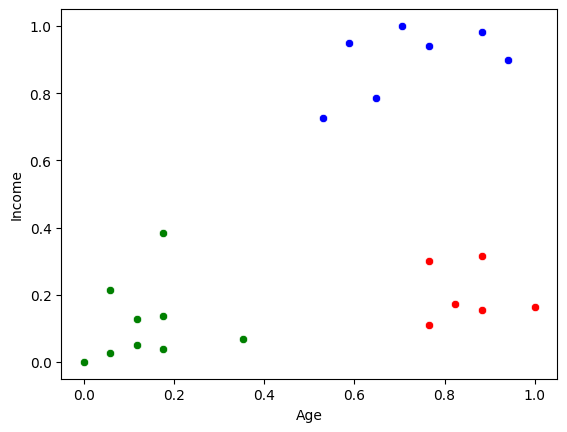

In [163]:
sns.scatterplot(x=df1['Age'],y=df1['Income'],color='green')
sns.scatterplot(x=df2['Age'],y=df2['Income'],color='red')
sns.scatterplot(x=df3['Age'],y=df3['Income'],color='blue')

In [169]:
krange=range(1,10)
sse=[]
for k in krange:
    mm=KMeans(n_clusters=k)
    mm.fit(df[['Age',"Income"]])
    sse.append(mm.inertia_)

C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Asus\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\

In [170]:
sse   # this is the list of sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553096,
 0.34910470944195654,
 0.26640301246684156,
 0.21055478995472496,
 0.16869711728567788,
 0.13265419827245162,
 0.10188787724979426]

<AxesSubplot: >

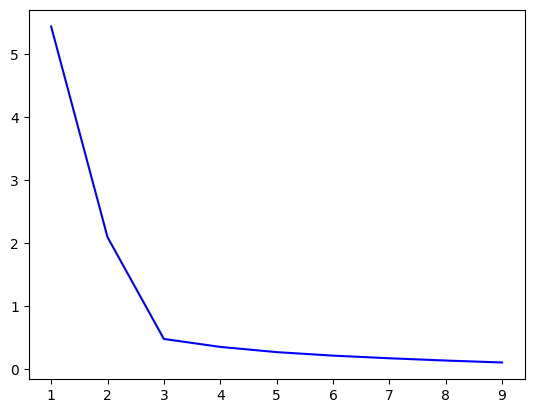

In [173]:
sns.lineplot(x=krange,y=sse,color="blue")

In [ ]:
# here the elbow is at 3 so the proper value of k would be 3